# Machine Learning Assignment 2
### Jimmy Nguyen

# Question 1:
## (S, T) and (U, V ) form an orthogonal and non-orthogonal coordinate system, respectively, for the same space. Let →e s = [Sx, Sy] and →e t = [Tx, Ty] as the orthonormal basis for system [S, T]. Let →e u = [Ux, Uy] and →e v = [Vx, Vy] be unit vectors and form a basis for system [U, V ]. Figure 1 depicts the coordinate systems, with X − Y forming the original coordinate system, S − T forming the orthogonal one, and U − V forming the non-orthogonal one.
## Let →q = [qx, qy] be an arbitrary vector. Compute:

### 1). the coordinate of →q in the space of [S, T].

Dot Product:

q s = →q * →e s

q t = →q * →e t

### 2). the coordinate of →q in the space of [U, V ].

Dot Product:

q u = →q * →e u

q v = →q * →e v

### 3). Can you explain why orthogonal basis makes things easier to handle?

The orthogonal basis vectors are linearly independent and the dot product of the basis vectors only has nonzero elements, which makes calculating vectors much simpler.

# Question 2:
## Write your own class in Python to perform PCA analysis. Require that your input datafollow the format where rows are samples and columns are variables. Your functionshould do the following:
### (1). Do mean-centering.
### (2). Compute the covariance matrix using numpy.cov().
### (3). Perform eigen-decomposition using numpy.linalg.eig().
### (4). Project the data onto the principal component axes.
### (5). Return the variance and percent variance that each PC explains, all of the scores, and loadings.

In [1]:
# My PCA Class

class MyPCA:
    
    def __init__(self, num_components):
        
        self.num_components = num_components
        self.components = None # Call loadings
        self.X_mean = None
        self.eigenvalues = None # Call variance
        self.covmatrix = None # Call covariance matrix
        
    def fit_transform(self, X):
        
        # Mean-Center
        self.X_mean = np.mean(X, axis = 0)
        X = X - self.X_mean
    
        # Covariance Matrix
        cov_matrix = np.cov(X.astype(float), rowvar = False)
        self.covmatrix = cov_matrix
        
        # Eigen-Decomposition
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        
        # Sort Eigenvectors in Descending Order
        eigenvectors = eigenvectors.transpose()
        index = np.argsort(eigenvalues)[::-1]
        eigenvalues_sorted = eigenvalues[index]
        eigenvectors_sorted = eigenvectors[index]
        
        self.eigenvalues = eigenvalues_sorted
        
        self.components = eigenvectors_sorted[0:self.num_components]
    
        # Projecting Data
        return np.dot(X, self.components.transpose())
    
    def explained_variance(self):
        
        # Calculating Explained Variance
        var_expl = []
        tot_eigenvalues = sum(self.eigenvalues)
        for i in self.eigenvalues:
            percent_var_expl = (i/tot_eigenvalues)*100
            var_expl.append(percent_var_expl)
        
        return var_expl

# Question 3:
## Apply your own PCA function to the dataset “Homework 2 dataset prob3.csv”. In thisdataset, columns correspond to variables.

In [2]:
# PCA on Dataset 3

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_3 = pd.read_csv('Homework_2_dataset_prob3.csv')
X3 = data_3.to_numpy()

num_components = min(X3.shape[0], X3.shape[1])

object_pca = MyPCA(num_components = num_components)
pca_results = object_pca.fit_transform(X3)

### • Plot the scores plot.

In [3]:
# Printing Scores for Dataset 3

print('Scores: {}'.format(pca_results))

Scores: [[ 22.98125567  -1.37554593]
 [ 22.49894927  -2.28970193]
 [ 20.005713    -1.36361068]
 [ 19.25038654  -2.02791987]
 [ 17.43671516  -1.72371377]
 [ 15.7347048   -1.52169118]
 [ 13.81334629  -1.11893815]
 [ 12.92246342  -1.65919662]
 [ 11.67612091  -1.87416596]
 [  9.20147893  -0.96509075]
 [  8.66382649  -1.82859835]
 [  6.12162538  -0.85769827]
 [  5.65215179  -1.78359786]
 [  6.22197684  -3.66058307]
 [  1.47693189  -0.67381093]
 [  1.65972922  -2.19661835]
 [  1.39460442  -3.30952212]
 [ -0.97476546  -2.4967838 ]
 [ -3.36938661  -1.66093746]
 [ -4.08672549  -2.36000994]
 [ -7.05572945  -0.99853296]
 [ -6.55487496  -2.81240164]
 [ -7.89657768  -2.9401047 ]
 [ -9.95393323  -2.41289772]
 [-12.20501147  -1.70841075]
 [-13.03194198  -2.30719345]
 [-12.68705447  -3.97833325]
 [-14.87113662  -3.33515589]
 [-17.11119877  -2.64074999]
 [-18.37071021  -2.84366813]
 [ 18.18280056   3.0156285 ]
 [ 18.7298962    1.15944348]
 [ 16.45861679   1.88241701]
 [ 13.81928105   2.94220718]
 [ 12.

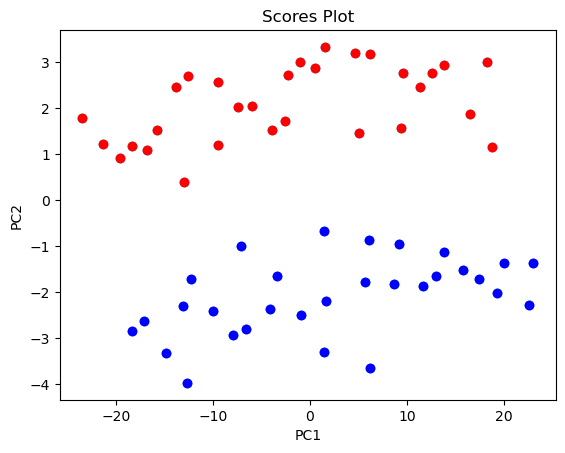

In [4]:
# Plotting Scores for Dataset 3

scores = pca_results

scores1 = scores[:,0]
scores2 = scores[:,1]

plt.scatter(scores1, scores2)
plt.scatter(scores1[:30], scores2[:30], color = 'blue')
plt.scatter(scores1[30:], scores2[30:], color = 'red')
plt.title('Scores Plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### • Do you see a clear separation of the raw data?

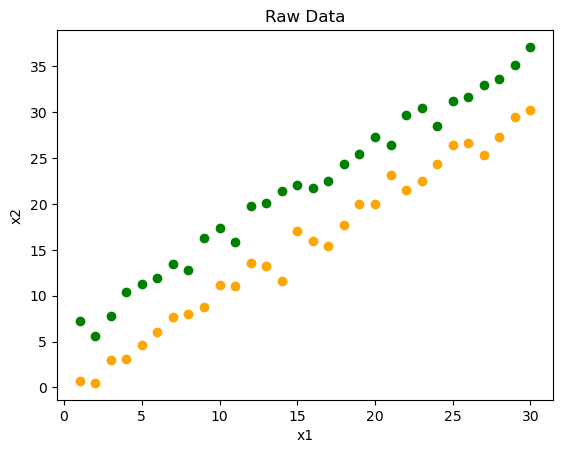

In [5]:
# Plotting Raw Dataset 3

raw_x1 = X3[:,0]
raw_x2 = X3[:,1]

plt.figure()

plt.scatter(raw_x1[30:], raw_x2[30:], color = 'green')
plt.scatter(raw_x1[:30], raw_x2[:30], color = 'orange')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Raw Data')
plt.show()

Yes, we can see a clear seperation of the raw data between the first 30 samples and the last 30 samples.

### • Can you still separate them after you project your raw data onto your first principal component?

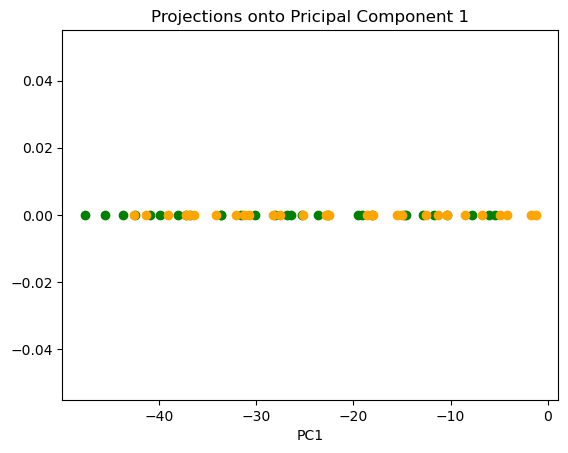

In [6]:
# Projecting Raw Dataset 3 onto PC1

projection = np.dot(X3, object_pca.components[:,0])

plt.figure()
plt.scatter(projection[30:], np.zeros_like(projection)[30:], color = 'green')
plt.scatter(projection[:30], np.zeros_like(projection)[:30], color = 'orange')

plt.xlabel('PC1')
plt.title('Projections onto Pricipal Component 1')

plt.show()

No, the raw data cannot be seperated after projecting onto the first principal component.

### • What message can you get from this observation?

From the raw data being projected onto the first principal component, it can be observed that the majority of the variance in the data is described by PC1.

### • What is the variance of the projections on PC1 and PC2. What is the relationship between these variances and the eigenvalues of your covariance matrix?

In [7]:
print('Explained Variance: {}'.format(object_pca.eigenvalues))

Explained Variance: [161.04072383   5.12528389]


In [8]:
print('Percent Explained Variance: {}'.format(object_pca.explained_variance()))

Percent Explained Variance: [96.9155641650062, 3.084435834993781]


In [9]:
print('Covariance Matrix: {}'.format(object_pca.covmatrix))


Covariance Matrix: [[76.18644068 77.65206707]
 [77.65206707 89.97956704]]


The sum of the explained variances are equal to the sum of the eigenvalues of the covariance matrix.

161.04072383 + 5.12528389 = 166.16600772

76.18644068 + 89.97956704 = 166.16600772 

# Question 4:

## Apply your own PCA function to the dataset “Homework 2 dataset prob4.csv”. In this dataset, rows correspond to different variables and columns correspond to different samples. You will need to transpose it before PCA analysis because your own PCA function requires columns to be variables.

In [10]:
# Getting Dataset 4 in Correct Format

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_4 = pd.read_csv('Homework_2_dataset_prob4.csv', index_col = 0)
data_4 = data_4.transpose()

X4 = data_4.to_numpy()

num_components = min(X4.shape[0], X4.shape[1])

data_4

ComponetID,v1,v5,v17,v51,v68,v79,v117,v118,v132,v138,...,v4681,v4686,v4690,v4700,v4711,v4762,v4779,v4816,v4821,v4888
s 1,13149,162952,0,36557,0,173049,876770,155480,6458,11102,...,6290,10069,5827,0,168228,10179,189013,0,0,48345
s 3,15519,180989,31487,38760,0,117192,553371,26951,6316,2424,...,6809,0,5810,0,143683,7378,115520,0,0,125184
s 5,19836,158248,85956,35297,4938,152004,1525264,118552,5565,9918,...,14066,0,11784,2572,162778,6003,147683,2256,9181,139848
s 7,15295,229520,0,37840,4550,99548,916726,70027,4690,0,...,15710,18619,0,1450,160915,8358,161317,0,3429,203533
s 9,13914,263812,0,24565,6474,141102,1330384,212695,6138,11507,...,18872,31384,0,0,128767,7390,172217,1613,10970,853223
s11,20420,0,71313,19599,5683,117173,621676,0,6676,11898,...,17330,19340,0,4103,324707,21486,354677,0,1696,247335
s13,0,52334,154987,34990,5026,99758,1079832,0,0,7431,...,12977,4530,5364,0,319847,24798,426314,1197,8133,69474
s15,9446,255144,0,18844,6963,129630,2014771,153927,0,8669,...,14672,18686,0,0,361370,22935,411819,1513,0,75206
s17,0,0,113738,29631,8716,76964,1196309,200490,0,6587,...,10424,6117,9251,0,180628,13730,195176,0,0,168838
s19,0,248804,0,38666,5780,101756,925441,126646,6802,11049,...,15216,0,10270,2769,136620,6075,126239,1572,4630,242081


In [11]:
# PCA and Scores for Dataset 4

object_pca = MyPCA(num_components = num_components)
pca_results = object_pca.fit_transform(X4)
pca_results = np.real(pca_results)

print('Scores: {}'.format(pca_results))

Scores: [[ 1.01542992e+07 -2.31838943e+06 -2.73400695e+06 -2.05772850e+06
   5.90979616e+05  1.85996829e+06  1.60386725e+06  1.20635674e+06
   1.79025268e+06  8.61026067e+05 -7.68528339e+05  5.06539054e+05
   3.37892145e+05  3.09482945e+05  2.49770717e+05 -5.37026554e+04
   1.18617553e+05 -4.47721871e+05 -7.58410688e+04  1.99906935e-09]
 [ 2.97144812e+07 -5.94512352e+05  4.36059705e+06  3.97725790e+06
  -2.31088616e+06 -6.51038147e+05 -3.44869809e+05  1.17736861e+05
   5.55133977e+04  4.07692484e+05  8.27158303e+05  6.42370920e+05
   8.24337450e+04 -3.82592419e+05  2.31188935e+04 -5.62766017e+04
   1.03695412e+05 -1.04366944e+05  1.50385664e+05  3.45244189e-09]
 [-1.14458427e+07 -6.33668418e+06 -1.03673037e+06  2.67897419e+06
   8.16595109e+05  1.73871490e+06 -6.05056631e+05 -1.43072656e+06
   7.08470906e+05 -4.38847145e+05 -3.81080288e+04 -1.12764815e+05
   7.58271077e+05 -5.85187753e+05 -4.00035050e+05  1.94747623e+05
  -5.49293768e+05 -3.10687085e+05  7.69467916e+04  1.20053301e-10]

### Plot the scree plot for PC1 and PC2 and indicate the percentage of variance that PC1 and PC2 explains respectively.

/Users/jimmynguyen/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0.5, 1.0, 'Scree Plot (All PCs)')

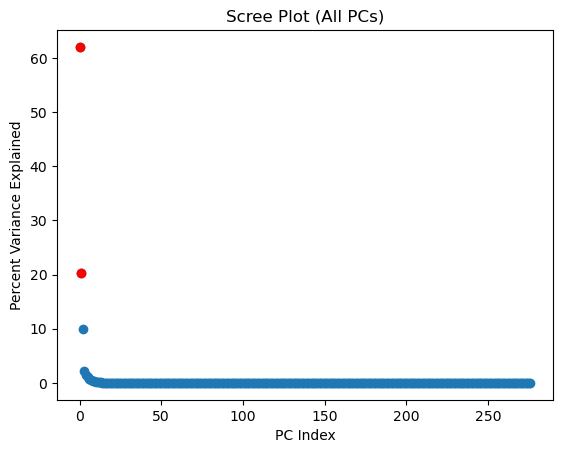

In [12]:
# Plotting All Principal Components

plt.scatter(range(len(object_pca.explained_variance())), object_pca.explained_variance())
plt.scatter(range(len(object_pca.explained_variance()[0:2])), object_pca.explained_variance()[0:2], color='red')

plt.xlabel('PC Index')
plt.ylabel('Percent Variance Explained')
plt.title('Scree Plot (All PCs)')

Text(0.5, 1.0, 'Scree Plot (PC1 & PC2)')

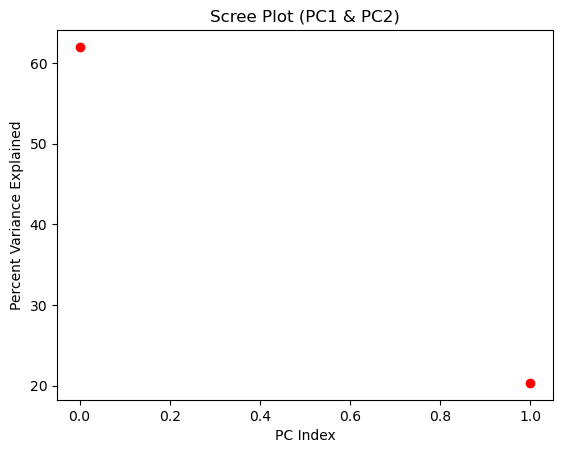

In [13]:
# Plotting Principal Components 1 & 2

plt.scatter(range(len(object_pca.explained_variance()[0:2])), object_pca.explained_variance()[0:2], color='red')

plt.xlabel('PC Index')
plt.ylabel('Percent Variance Explained')
plt.title('Scree Plot (PC1 & PC2)')

In [14]:
# Percent Explained Variance for PC1 & PC2

print('Percent Explained Variance: {}'.format(np.real(object_pca.explained_variance())[0:2]))

Percent Explained Variance: [62.01722085 20.32548864]


### Also plot the scores plot and loadings plot.

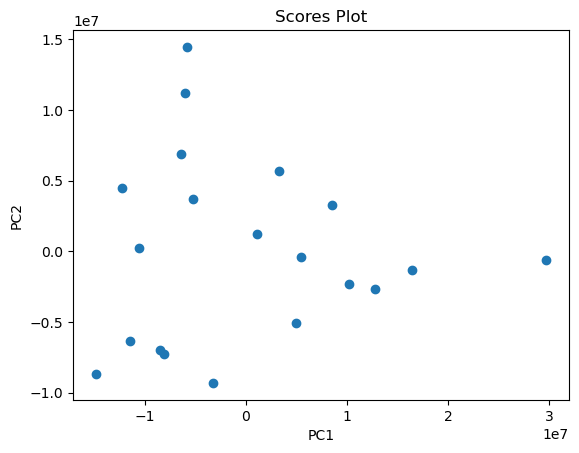

In [15]:
# Plotting Scores for Dataset 4

scores = pca_results

scores1 = scores[:,0]
scores2 = scores[:,1]

plt.scatter(scores1, scores2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scores Plot')

plt.show()

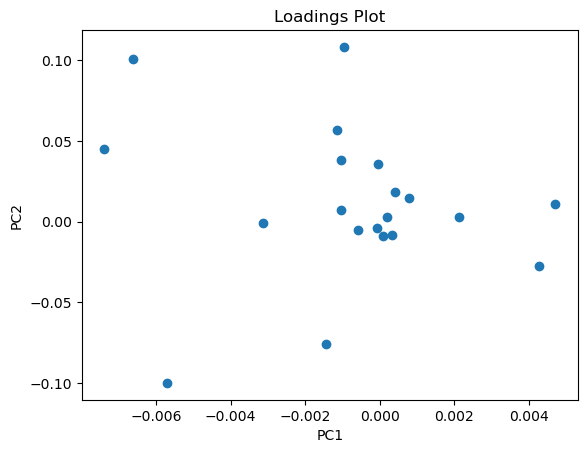

In [16]:
# Plotting Loadings for Dataset 4

loadings = object_pca.components
loadings = np.real(object_pca.components)

loadings1 = loadings[:,0]
loadings2 = loadings[:,1]

plt.scatter(loadings1, loadings2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Loadings Plot')

plt.show()